In [4]:
# Attendance & Risk Monitoring - Exploratory Data Analysis (EDA)

# 1. IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
# 2. PATHS
base_path = r"C:\Users\jujuf\Documents\projeto_cultura_inglesa"
processed_path = os.path.join(base_path, "data", "processed")

In [7]:
# 3. LOAD DATA
students_df = pd.read_csv(os.path.join(processed_path, "students.csv"))
weekly_absences_df = pd.read_csv(os.path.join(processed_path, "weekly_absences.csv"))
absences_30d_df = pd.read_csv(os.path.join(processed_path, "absences_30d.csv"))

In [8]:
# 4. BASIC DATA OVERVIEW
print("Students shape:", students_df.shape)
print("Weekly Absences shape:", weekly_absences_df.shape)
print("Absences 30 Days shape:", absences_30d_df.shape)

print("\nStudents sample:")
display(students_df.head())

print("\nWeekly Absences sample:")
display(weekly_absences_df.head())

print("\nAbsences 30 Days sample:")
display(absences_30d_df.head())

Students shape: (372, 8)
Weekly Absences shape: (4248, 8)
Absences 30 Days shape: (354, 3)

Students sample:


,student_id,name,branch,level,enrollment_date,status,class_id,active
0,1,Gabrielle Davis,Coral Gables,Beginner,2025-12-25,Active,T01,True
1,2,Ryan Munoz,Coral Gables,Beginner,2025-08-20,Active,T01,True
2,3,Monica Herrera,Coral Gables,Beginner,2026-01-21,Active,T01,True
3,4,Jamie Arnold,Coral Gables,Beginner,2025-05-14,Active,T01,True
4,5,Lisa Hensley,Coral Gables,Beginner,2025-08-03,Active,T01,True



Weekly Absences sample:


,enrollment_id,year,week,absences_per_week,risk_status,week_start_date,week_end_date,week_label
0,E0001,2025,46,1,Attention,2025-11-10,2025-11-14,10/11/2025 - 14/11/2025
1,E0001,2025,47,2,Priority,2025-11-17,2025-11-21,17/11/2025 - 21/11/2025
2,E0001,2025,48,1,Attention,2025-11-24,2025-11-28,24/11/2025 - 28/11/2025
3,E0001,2025,49,2,Priority,2025-12-01,2025-12-05,01/12/2025 - 05/12/2025
4,E0001,2025,50,1,Attention,2025-12-08,2025-12-12,08/12/2025 - 12/12/2025



Absences 30 Days sample:


,enrollment_id,absences_30d,risk
0,E0001,3,Medium Risk
1,E0002,5,High Risk
2,E0003,1,Normal
3,E0004,0,Normal
4,E0005,0,Normal



Number of students per branch:


branch
Doral           79
Miami Beach     77
Coral Gables    76
Kendall         74
Downtown        66
Name: count, dtype: int64


Number of students per level:


level
Beginner        129
Intermediate    124
Advanced        119
Name: count, dtype: int64

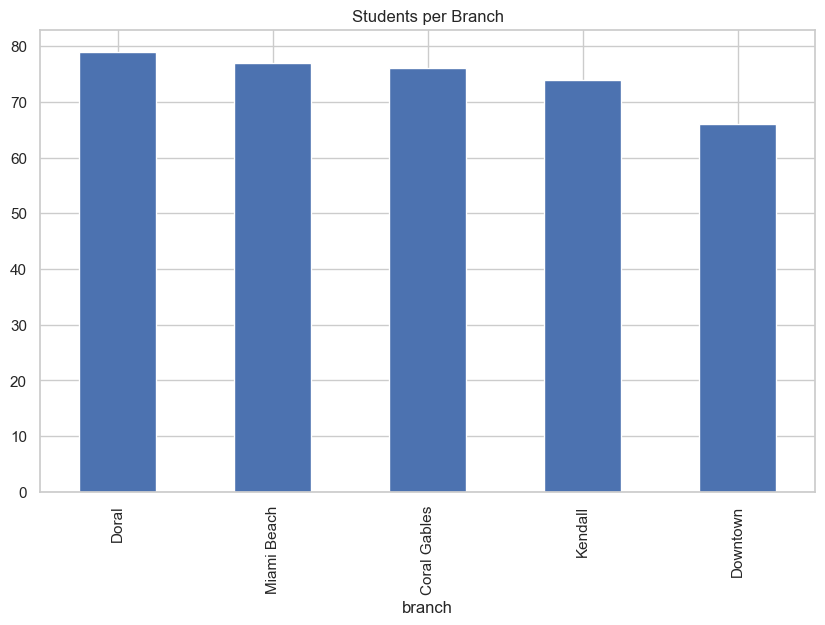

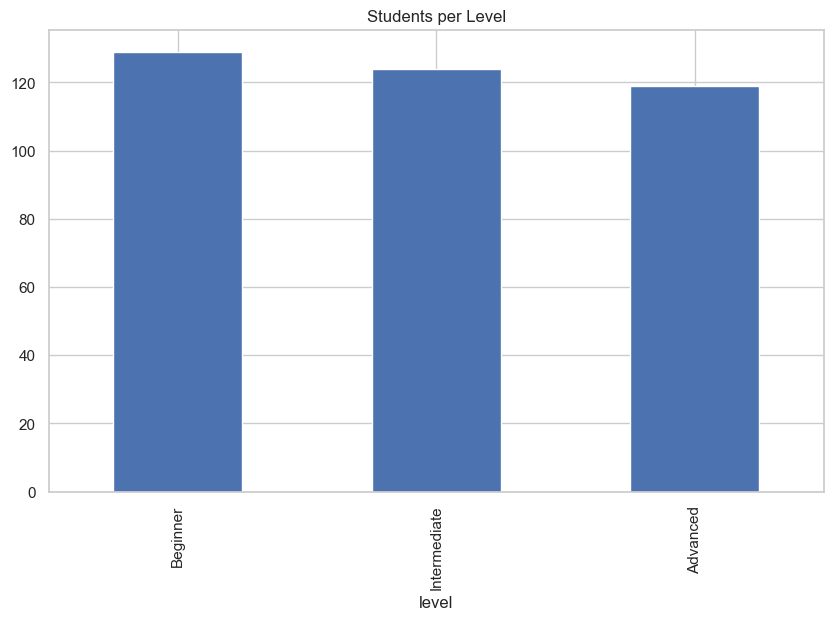

In [9]:
# 5. STUDENT DISTRIBUTION BY BRANCH AND LEVEL
branch_counts = students_df['branch'].value_counts()
level_counts = students_df['level'].value_counts()

print("\nNumber of students per branch:")
display(branch_counts)

print("\nNumber of students per level:")
display(level_counts)

# Plot
branch_counts.plot(kind='bar', title='Students per Branch')
plt.show()

level_counts.plot(kind='bar', title='Students per Level')
plt.show()


Number of students per 30-day risk level:


risk
Normal         259
Medium Risk     78
High Risk       17
Name: count, dtype: int64

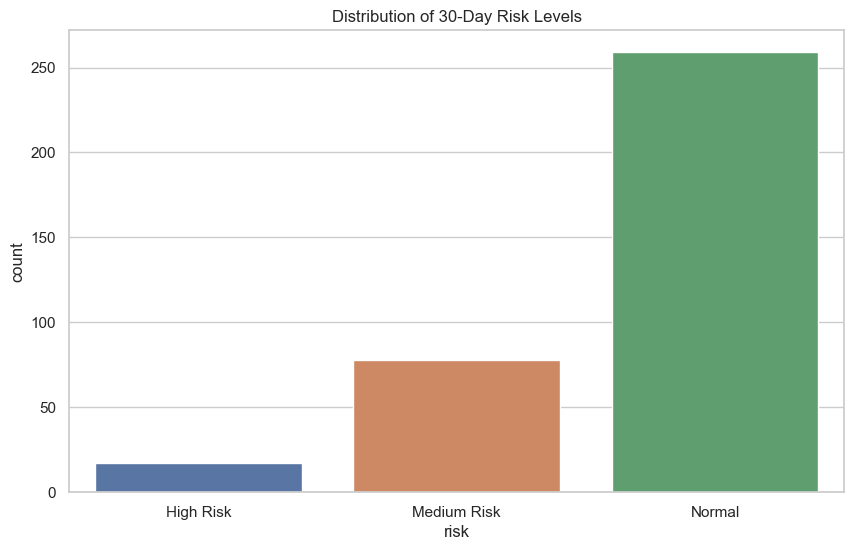

In [10]:
# 6. RISK DISTRIBUTION
risk_counts = absences_30d_df['risk'].value_counts()
print("\nNumber of students per 30-day risk level:")
display(risk_counts)

sns.countplot(data=absences_30d_df, x='risk', order=['High Risk','Medium Risk','Normal'])
plt.title("Distribution of 30-Day Risk Levels")
plt.show()


Weekly Risk Status counts:


risk_status
Normal       2491
Attention    1099
Priority      658
Name: count, dtype: int64

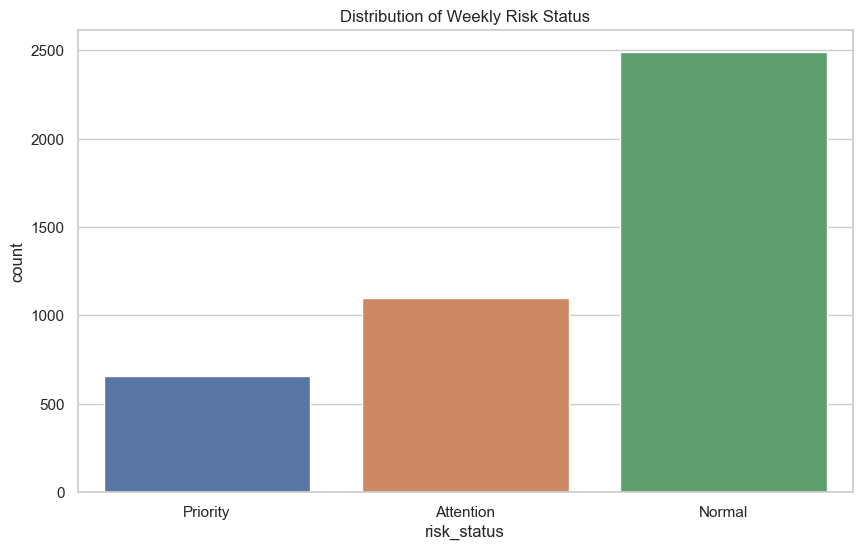

In [11]:
# 7. WEEKLY PRIORITY STATUS
weekly_risk_counts = weekly_absences_df['risk_status'].value_counts()
print("\nWeekly Risk Status counts:")
display(weekly_risk_counts)

sns.countplot(data=weekly_absences_df, x='risk_status', order=['Priority','Attention','Normal'])
plt.title("Distribution of Weekly Risk Status")
plt.show()

C:\Users\jujuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jujuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


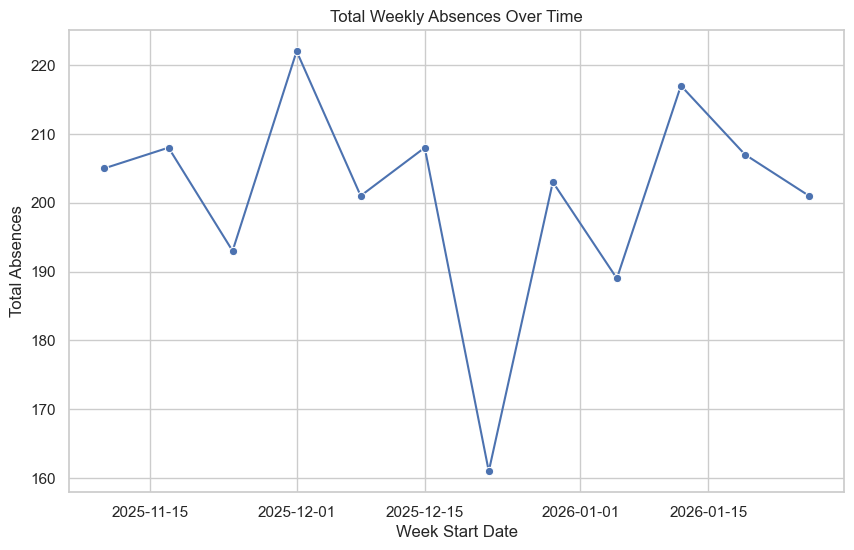

In [12]:
# 8. ABSENCES OVER TIME (WEEKLY)
# Total absences per week
weekly_summary = weekly_absences_df.groupby('week_start_date')['absences_per_week'].sum().reset_index()
weekly_summary['week_start_date'] = pd.to_datetime(weekly_summary['week_start_date'])

sns.lineplot(data=weekly_summary, x='week_start_date', y='absences_per_week', marker='o')
plt.title("Total Weekly Absences Over Time")
plt.xlabel("Week Start Date")
plt.ylabel("Total Absences")
plt.show()

In [ ]:
# 10. NOTES
print("EDA complete. Check for inconsistencies, missing data, or outliers before loading into Power BI.")
